In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import os

path = os.listdir('D:/Minor Project - 7th Semester/spine-fracture-prediction-from-xrays/cervical fracture/train/')
classes = {'normal':0, 'fracture':1}

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'D:/Minor Project - 7th Semester/spine-fracture-prediction-from-xrays/cervical fracture/train/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

In [5]:
np.unique(Y)

array([0, 1])

In [6]:
pd.Series(Y).value_counts()

0    1900
1    1893
Name: count, dtype: int64

In [7]:
X.shape

(3793, 200, 200)

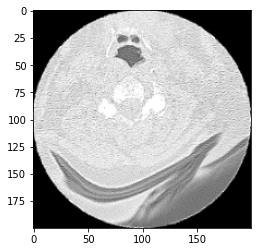

In [8]:
plt.imshow(X[4], cmap='gray')

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(3793, 40000)

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [11]:
xtrain.shape, xtest.shape

((3034, 40000), (759, 40000))

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [13]:
from sklearn.decomposition import PCA

In [14]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)
# pca_train = xtrain
# pca_test = xtest

(3034, 40000) (759, 40000)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [16]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [17]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [18]:
print("Training Score:", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))

Training Score: 1.0
Testing Score: 0.997364953886693


In [19]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

Training Score: 1.0
Testing Score: 0.9986824769433466


In [20]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([91], dtype=int64),)

In [21]:
pred[91]

0

In [22]:
ytest[91]
#Mis-classified data

1

In [23]:
dec = {0:'normal', 1:'fracture'}

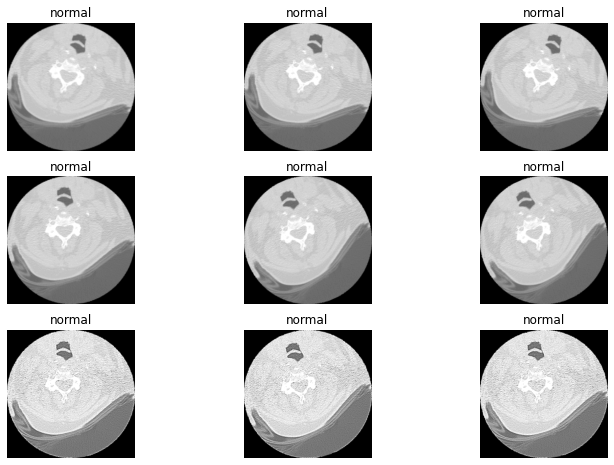

In [24]:
plt.figure(figsize=(12,8))
p = os.listdir('D:/Minor Project - 7th Semester/spine-fracture-prediction-from-xrays/cervical fracture/val/')
c=1
for i in os.listdir('D:/Minor Project - 7th Semester/spine-fracture-prediction-from-xrays/cervical fracture/val/normal/')[6:15]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('D:/Minor Project - 7th Semester/spine-fracture-prediction-from-xrays/cervical fracture/val/normal/'+i,0)
    img1 = cv2.resize(img, (53,14))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title("normal")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

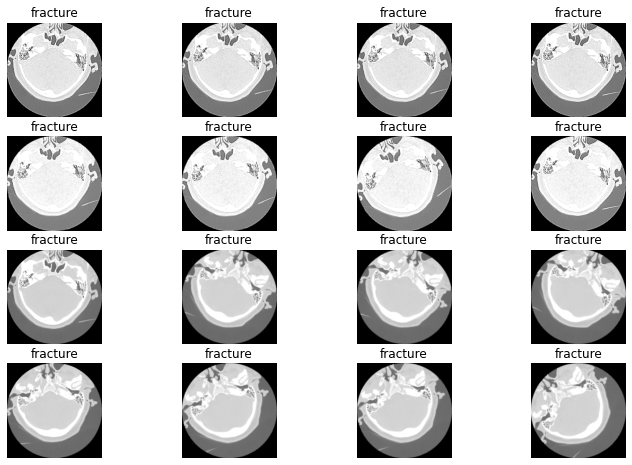

In [25]:
plt.figure(figsize=(12,8))
p = os.listdir('D:/Minor Project - 7th Semester/spine-fracture-prediction-from-xrays/cervical fracture/val/')
c=1
for i in os.listdir('D:/Minor Project - 7th Semester/spine-fracture-prediction-from-xrays/cervical fracture/val/fracture/')[12:28]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('D:/Minor Project - 7th Semester/spine-fracture-prediction-from-xrays/cervical fracture/val/fracture/'+i,0)
    img1 = cv2.resize(img, (14,53))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

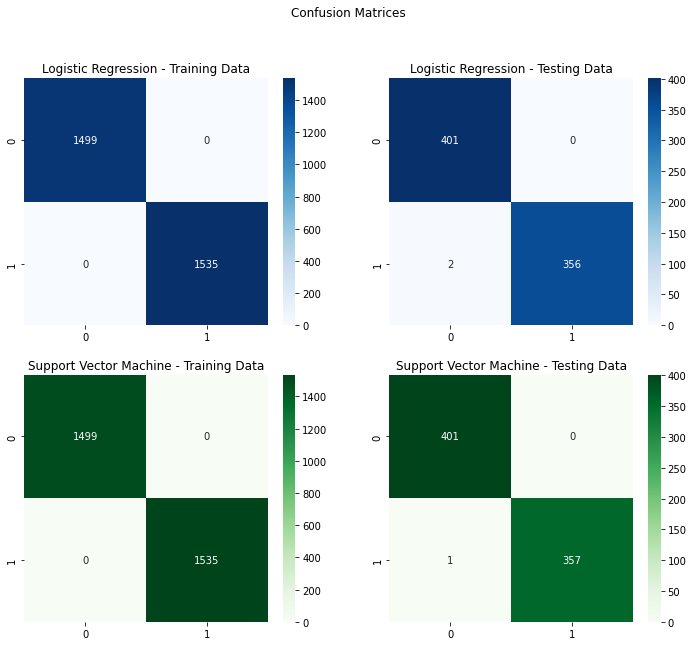

In [26]:
#Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Logistic Regression
lg_train_preds = lg.predict(pca_train)
lg_test_preds = lg.predict(pca_test)
# Support Vector Machine
sv_train_preds = sv.predict(pca_train)
sv_test_preds = sv.predict(pca_test)
# Confusion matrices
lg_train_cm = confusion_matrix(ytrain, lg_train_preds)
lg_test_cm = confusion_matrix(ytest, lg_test_preds)
sv_train_cm = confusion_matrix(ytrain, sv_train_preds)
sv_test_cm = confusion_matrix(ytest, sv_test_preds)
# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Confusion Matrices")
# Logistic Regression - Training Data
sns.heatmap(lg_train_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title("Logistic Regression - Training Data")
# Logistic Regression - Testing Data
sns.heatmap(lg_test_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title("Logistic Regression - Testing Data")
# Support Vector Machine - Training Data
sns.heatmap(sv_train_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1, 0])
axes[1, 0].set_title("Support Vector Machine - Training Data")
# Support Vector Machine - Testing Data
sns.heatmap(sv_test_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1, 1])
axes[1, 1].set_title("Support Vector Machine - Testing Data")
plt.show()

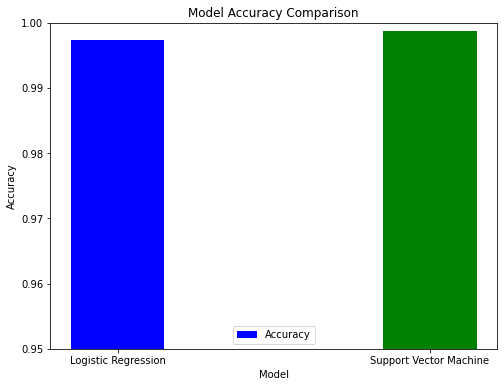

In [27]:
#Bar Graph
import matplotlib.pyplot as plt
import numpy as np
models = ['Logistic Regression', 'Support Vector Machine']
accuracies = [lg.score(pca_test, ytest), sv.score(pca_test, ytest)]
# Create an array of x positions for the bars
x = np.arange(len(models))
# Create a grouped bar chart with a narrower bar width
plt.figure(figsize=(8, 6))
width = 0.3  # Adjust the width to make bars narrower
plt.bar(x, accuracies, width, label='Accuracy', color=['blue', 'green'])
plt.xticks(x, models)
plt.ylim(0.95, 1.0)  # Adjust the y-axis limits to magnify small differences
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

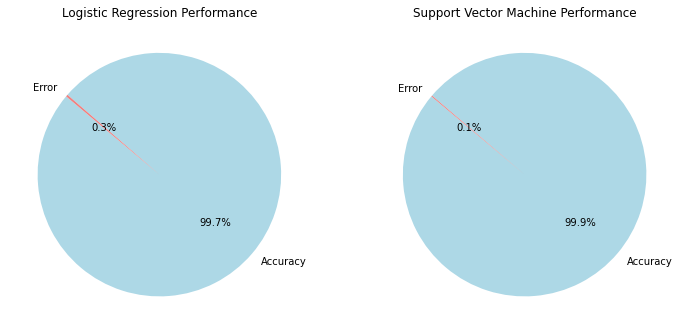

In [28]:
#Pie Chart
import matplotlib.pyplot as plt
lg_accuracy = lg.score(pca_test, ytest)
lg_error = 1 - lg_accuracy
sv_accuracy = sv.score(pca_test, ytest)
sv_error = 1 - sv_accuracy
# Labels for the pie chart
labels = ['Accuracy', 'Error']
# Data for the first pie chart (Logistic Regression)
lg_data = [lg_accuracy, lg_error]
# Data for the second pie chart (Support Vector Machine)
sv_data = [sv_accuracy, sv_error]
# Colors for the pie chart segments
colors = ['lightblue', 'lightcoral']
# Create the first pie chart (Logistic Regression)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(lg_data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Logistic Regression Performance')
# Create the second pie chart (Support Vector Machine)
plt.subplot(1, 2, 2)
plt.pie(sv_data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Support Vector Machine Performance')
plt.show()